In [1]:
# In this deep learning project, we built a classifier to detect the brain tumor (if any) from the MRI scan images. This is a binary classification problem.

Dataset link: https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection
    

In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
# Encoding the target classes
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk('C:/Users/user/brain tumour/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk('C:/Users/user/brain tumour/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
#Splitting the data for training and testing

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
#Model Building

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 47s 12s/step - loss: 33.0709 - accuracy: 0.5766 - val_loss: 54.4699 - val_accuracy: 0.6071
Epoch 2/30
3/3 [==============================] - 13s 4s/step - loss: 12.0160 - accuracy: 0.7387 - val_loss: 24.1599 - val_accuracy: 0.6429
Epoch 3/30
3/3 [==============================] - 12s 4s/step - loss: 7.3862 - accuracy: 0.7207 - val_loss: 40.3444 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 12s 4s/step - loss: 2.1183 - accuracy: 0.8649 - val_loss: 24.7072 - val_accuracy: 0.6071
Epoch 5/30
3/3 [==============================] - 12s 4s/step - loss: 1.6728 - accuracy: 0.8829 - val_loss: 10.8340 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 12s 4s/step - loss: 2.1372 - accuracy: 0.8739 - val_loss: 9.6789 - val_accuracy: 0.7143
Epoch 7/30
3/3 [==============================] - 12s 4s/step - loss: 0.6562 - accuracy: 0.9369 - val_loss: 9.6716 - val_accuracy: 0.6786
Epoch 8/30
3/3 [==========

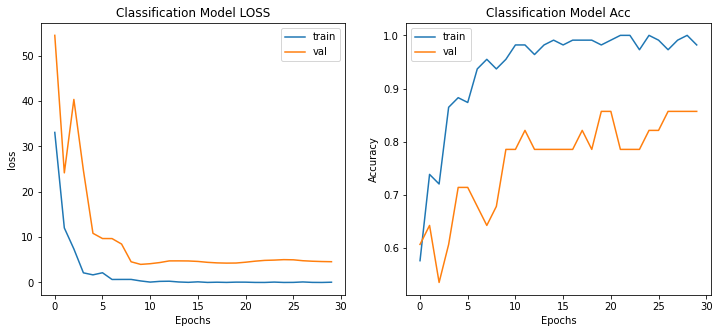

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title("Classification Model LOSS");
plt.ylabel("loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [12]:
model.save("model.h5")

In [13]:
#checking the model prediction

In [14]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a tumor'

99.99998807907104% Confidence Its a Tumor


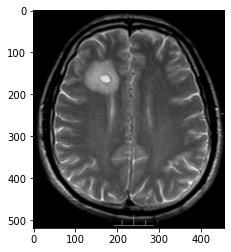

In [22]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/user/brain tumour/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence Its not a tumor


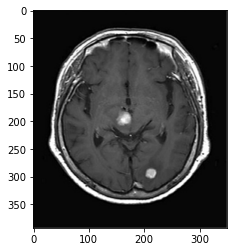

In [23]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/user/brain tumour/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))